Data from https://www.cryptodatadownload.com/data/gemini/

Part 1: Data Exploration

In [171]:
import pandas as pd
from datetime import datetime, timedelta
from pandas.tseries.holiday import USFederalHolidayCalendar
import matplotlib.pyplot as plt
import numpy as np

In [172]:
# Load data from CSV file
btc_data = pd.read_csv('Gemini_BTCUSD_1h.csv') # of course, make sure the file is saved in the same folder

In [173]:
# Ensure the date column is in datetime format
btc_data['date'] = pd.to_datetime(btc_data['date'])

# Set the date column as the index
btc_data.set_index('date', inplace=True)

In [174]:
# Halvening dates
halvening_dates = [
    datetime(2012, 11, 28),
    datetime(2016, 7, 9),
    datetime(2020, 5, 11),
    datetime(2024, 4, 19)
]

# Calculate days since the most recent halvening
btc_data['days_since_halvening'] = btc_data.index.map(
    lambda x: min((x - halvening).days for halvening in halvening_dates if x >= halvening)
)

In [175]:
# Determine the Bitcoin cycle
def determine_cycle(date):
    if date < halvening_dates[0]:
        return "2009"
    for i in range(len(halvening_dates) - 1):
        if halvening_dates[i] <= date < halvening_dates[i + 1]:
            return f"{halvening_dates[i].year}"
    return f"{halvening_dates[-1].year}"

btc_data['bitcoin_cycle'] = btc_data.index.map(determine_cycle)

In [81]:
#check data
#btc_data.to_csv("btc_nyse_trading_returns_0.csv")

In [176]:
# Filter data to NYSE trading days only
# NYSE is open Monday to Friday, excluding holidays
btc_data['day'] = btc_data.index.date
btc_data['hour'] = btc_data.index.hour
btc_data['minute'] = btc_data.index.minute
btc_data['is_weekday'] = btc_data.index.weekday < 5
btc_data['weekday'] = btc_data.index.dayofweek
btc_data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,days_since_halvening,bitcoin_cycle,day,hour,minute,is_weekday,weekday
date,,,,,,,,,,,,,,,
2025-01-14 23:00:00,1.736900e+12,BTC/USD,96676.75,96749.99,96478.67,96522.62,16.557917,1.598213e+06,270,2024,2025-01-14,23,0,True,1
2025-01-14 22:00:00,1.736890e+12,BTC/USD,96447.05,96714.89,96408.36,96676.75,16.926659,1.636414e+06,270,2024,2025-01-14,22,0,True,1
2025-01-14 21:00:00,1.736890e+12,BTC/USD,96438.70,96636.63,96263.89,96447.05,39.525913,3.812158e+06,270,2024,2025-01-14,21,0,True,1
2025-01-14 20:00:00,1.736880e+12,BTC/USD,96492.52,96888.72,96101.00,96438.70,118.510080,1.142896e+07,270,2024,2025-01-14,20,0,True,1
2025-01-14 19:00:00,1.736880e+12,BTC/USD,96722.25,97053.69,96409.21,96492.52,54.923111,5.299669e+06,270,2024,2025-01-14,19,0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-08 17:00:00,1.444324e+09,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02,1044,2012,2015-10-08,17,0,True,3
2015-10-08 16:00:00,1.444320e+09,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02,1044,2012,2015-10-08,16,0,True,3
2015-10-08 15:00:00,1.444316e+09,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02,1044,2012,2015-10-08,15,0,True,3


In [56]:
#btc_data.to_csv("btc_nyse_trading_returns_1.csv")

In [177]:
# Load NYSE holidays to exclude them
cal = USFederalHolidayCalendar()
nyse_holidays = cal.holidays(start=btc_data.index.min().date(), end=btc_data.index.max().date())

btc_data['is_nyse_open'] = btc_data['is_weekday'] & ~btc_data['day'].isin(nyse_holidays)
print(nyse_holidays)

DatetimeIndex(['2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
               '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02',
               '2019-10-14', '2019-11-11', '2019-11-28', '2019-12-25',
               '2020-01-01', '2020-01-20', '2020-02-17', '2020-05-25',
               '2020-07-03', '2020-09-07', '2020-10-12', '2020-11-11',
               '2020-11-26', '2020-12-25', '2021-01-01', '2021-01-18',
      

In [58]:
#btc_data.to_csv("btc_nyse_trading_returns_2.csv")

In [178]:
# Filter to only NYSE trading days
btc_data = btc_data[btc_data['is_nyse_open']]

In [61]:
#btc_data.to_csv("btc_nyse_trading_returns_3.csv")

In [179]:
# Further filter data to only include rows at 10 AM EST and 4:00 PM EST
btc_data = btc_data[((btc_data['hour'] == 10) & (btc_data['minute'] == 0)) | ((btc_data['hour'] == 16) & (btc_data['minute'] == 0))]

In [180]:
#btc_data.to_csv("btc_nyse_trading_returns_4.csv")
btc_data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,days_since_halvening,bitcoin_cycle,day,hour,minute,is_weekday,weekday,is_nyse_open
date,,,,,,,,,,,,,,,,
2025-01-14 16:00:00,1.736870e+12,BTC/USD,96421.92,96421.92,95306.38,95696.18,108.085321,1.034335e+07,270,2024,2025-01-14,16,0,True,1,True
2025-01-14 10:00:00,1.736850e+12,BTC/USD,97114.46,97178.92,96565.22,96654.87,50.546597,4.885575e+06,270,2024,2025-01-14,10,0,True,1,True
2025-01-13 16:00:00,1.736780e+12,BTC/USD,92069.85,92246.56,91185.26,91271.33,92.841637,8.473780e+06,269,2024,2025-01-13,16,0,True,0,True
2025-01-13 10:00:00,1.736760e+12,BTC/USD,92789.91,92813.20,91302.00,91563.68,189.189493,1.732289e+07,269,2024,2025-01-13,10,0,True,0,True
2025-01-10 16:00:00,1.736520e+12,BTC/USD,93703.33,94010.97,93173.13,93622.04,96.875526,9.069684e+06,266,2024,2025-01-10,16,0,True,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-12 16:00:00,1.444666e+09,BTC/USD,247.62,247.91,247.62,247.91,1.960000,4.859036e+02,1048,2012,2015-10-12,16,0,True,0,True
2015-10-12 10:00:00,1.444644e+09,BTC/USD,248.71,248.71,248.71,248.71,0.410000,1.019711e+02,1048,2012,2015-10-12,10,0,True,0,True
2015-10-09 16:00:00,1.444406e+09,BTC/USD,244.00,244.00,244.00,244.00,0.000000,0.000000e+00,1045,2012,2015-10-09,16,0,True,4,True


In [181]:
# Calculate log return for buying at 4:00 PM EST and selling at the next day's 10 AM EST
btc_data['return'] = None
btc_data['day_of_week'] = None
for i in range(len(btc_data) - 1):
    if btc_data.iloc[i].hour == 16 and btc_data.iloc[i].minute == 0:  # Check if the time is 4:00 PM
        today_close = btc_data.iloc[i]['close']

        # Find the next day's open at 10 AM EST
        next_day_open_idx = btc_data.index[i] + timedelta(days=1)
        next_day_open = btc_data[(btc_data.index.date == next_day_open_idx.date()) & (btc_data.index.hour == 10) & (btc_data.index.minute == 0)]
        if not next_day_open.empty:
            next_open = next_day_open.iloc[0]['open']
            btc_data.loc[btc_data.index[i], 'return'] = np.log(next_open / today_close)
            btc_data.loc[btc_data.index[i], 'day_of_week'] = btc_data.index[i].strftime('%A')

    # Special handling for Fridays
    if btc_data.iloc[i].hour == 16 and btc_data.iloc[i].minute == 0 and btc_data.index[i].weekday() == 4:  # Friday 4:00 PM
        today_close = btc_data.iloc[i]['close']

        # Find Monday's open at 10 AM EST
        monday_open_idx = btc_data.index[i] + timedelta(days=3)
        monday_open = btc_data[(btc_data.index.date == monday_open_idx.date()) & (btc_data.index.hour == 10) & (btc_data.index.minute == 0)]
        if not monday_open.empty:
            next_open = monday_open.iloc[0]['open']
            btc_data.loc[btc_data.index[i], 'return'] = np.log(next_open / today_close)
            btc_data.loc[btc_data.index[i], 'day_of_week'] = btc_data.index[i].strftime('%A')

In [182]:
#Check data calc
#btc_data.to_csv("btc_nyse_trading_returns_5.csv")
btc_data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,days_since_halvening,bitcoin_cycle,day,hour,minute,is_weekday,weekday,is_nyse_open,return,day_of_week
date,,,,,,,,,,,,,,,,,,
2025-01-14 16:00:00,1.736870e+12,BTC/USD,96421.92,96421.92,95306.38,95696.18,108.085321,1.034335e+07,270,2024,2025-01-14,16,0,True,1,True,None,None
2025-01-14 10:00:00,1.736850e+12,BTC/USD,97114.46,97178.92,96565.22,96654.87,50.546597,4.885575e+06,270,2024,2025-01-14,10,0,True,1,True,None,None
2025-01-13 16:00:00,1.736780e+12,BTC/USD,92069.85,92246.56,91185.26,91271.33,92.841637,8.473780e+06,269,2024,2025-01-13,16,0,True,0,True,0.062054,Monday
2025-01-13 10:00:00,1.736760e+12,BTC/USD,92789.91,92813.20,91302.00,91563.68,189.189493,1.732289e+07,269,2024,2025-01-13,10,0,True,0,True,None,None
2025-01-10 16:00:00,1.736520e+12,BTC/USD,93703.33,94010.97,93173.13,93622.04,96.875526,9.069684e+06,266,2024,2025-01-10,16,0,True,4,True,-0.008928,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-12 16:00:00,1.444666e+09,BTC/USD,247.62,247.91,247.62,247.91,1.960000,4.859036e+02,1048,2012,2015-10-12,16,0,True,0,True,0.001572,Monday
2015-10-12 10:00:00,1.444644e+09,BTC/USD,248.71,248.71,248.71,248.71,0.410000,1.019711e+02,1048,2012,2015-10-12,10,0,True,0,True,None,None
2015-10-09 16:00:00,1.444406e+09,BTC/USD,244.00,244.00,244.00,244.00,0.000000,0.000000e+00,1045,2012,2015-10-09,16,0,True,4,True,0.019119,Friday


In [183]:
# Calculate return for closing prices at 4:00 PM EST between consecutive trading days
btc_data['close_to_close_return'] = None
for i in range(len(btc_data) - 1):
    if btc_data.iloc[i].hour == 16 and btc_data.iloc[i].minute == 0:  # Check if the time is 4:00 PM
        today_close = btc_data.iloc[i]['close']

        # Handle Monday through Thursday
        next_close_idx = btc_data.index[i] + timedelta(days=1)
        next_close = btc_data[(btc_data.index.normalize() == next_close_idx.normalize()) & (btc_data.index.hour == 16) & (btc_data.index.minute == 0)]

        # Handle Friday (skip to Monday)
        if btc_data.index[i].weekday() == 4:  # Friday
            next_close_idx = btc_data.index[i] + timedelta(days=3)
            next_close = btc_data[(btc_data.index.normalize() == next_close_idx.normalize()) & (btc_data.index.hour == 16) & (btc_data.index.minute == 0)]

        if not next_close.empty:
            next_close_price = next_close.iloc[0]['close']
            btc_data.loc[btc_data.index[i], 'close_to_close_return'] = np.log(next_close_price / today_close)

In [235]:
# Drop rows without calculated returns
btc_data = btc_data.dropna(subset=['return'])
btc_data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,days_since_halvening,bitcoin_cycle,...,hour,minute,is_weekday,weekday,is_nyse_open,return,day_of_week,close_to_close_return,days_bucket,broader_bucket
date,,,,,,,,,,,,,,,,,,,,,
2025-01-13 16:00:00,1.736780e+12,BTC/USD,92069.85,92246.56,91185.26,91271.33,92.841637,8.473780e+06,269,2024,...,16,0,True,0,True,0.062054,Monday,0.047342,200,0-500
2025-01-10 16:00:00,1.736520e+12,BTC/USD,93703.33,94010.97,93173.13,93622.04,96.875526,9.069684e+06,266,2024,...,16,0,True,4,True,-0.008928,Friday,-0.025429,200,0-500
2025-01-09 16:00:00,1.736440e+12,BTC/USD,94221.39,94662.85,93840.07,94204.25,36.126766,3.403295e+06,265,2024,...,16,0,True,3,True,0.006228,Thursday,-0.006199,200,0-500
2025-01-08 16:00:00,1.736350e+12,BTC/USD,95446.31,95460.17,94525.03,94747.57,76.350011,7.233978e+06,264,2024,...,16,0,True,2,True,-0.01356,Wednesday,-0.005751,200,0-500
2025-01-07 16:00:00,1.736270e+12,BTC/USD,97903.53,98317.42,97506.57,97715.66,167.726628,1.638952e+07,263,2024,...,16,0,True,1,True,-0.023981,Tuesday,-0.030846,200,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-15 16:00:00,1.444925e+09,BTC/USD,255.31,255.40,255.00,255.00,1.000500,2.551275e+02,1051,2012,...,16,0,True,3,True,0.019418,Thursday,0.052816,1000,1000+
2015-10-14 16:00:00,1.444838e+09,BTC/USD,253.00,253.63,253.00,253.63,7.990000,2.026504e+03,1050,2012,...,16,0,True,2,True,0.007228,Wednesday,0.005387,1000,1000+
2015-10-13 16:00:00,1.444752e+09,BTC/USD,250.80,250.80,250.28,250.28,0.003956,9.899976e-01,1049,2012,...,16,0,True,1,True,0.00347,Tuesday,0.013296,1000,1000+


In [125]:
#check close to close return calc
#btc_data.to_csv("btc_nyse_trading_returns_6.csv")

In [249]:
#create copy for plotting
btc_data_plot = btc_data
btc_data_plot.to_csv("btc_dataforplotting.csv")

In [244]:
# Group returns into buckets of days since halvening (0-100, 100-200, ..., 1400-1500)
btc_data.loc[:, 'days_bucket'] = (btc_data['days_since_halvening'] // 100) * 100
btc_data.loc[:, 'days_bucket'] = btc_data['days_bucket'].clip(upper=1500)
returns_by_bucket = btc_data.groupby(['days_bucket', 'day_of_week'])[['return', 'close_to_close_return']].sum()


In [245]:
# Group returns into broader buckets (0-500, 500-1000, 1000+)
btc_data = btc_data.copy()  # Ensure modifications are applied to a copy of the DataFrame
def broader_bucket(days):
    if days <= 500:
        return '0-500'
    elif days <= 1000:
        return '500-1000'
    else:
        return '1000+'

btc_data['broader_bucket'] = btc_data['days_since_halvening'].apply(broader_bucket)
broader_returns = btc_data.groupby(['broader_bucket', 'day_of_week'])[['return', 'close_to_close_return']].sum()

In [187]:
btc_data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,days_since_halvening,bitcoin_cycle,...,hour,minute,is_weekday,weekday,is_nyse_open,return,day_of_week,close_to_close_return,days_bucket,broader_bucket
date,,,,,,,,,,,,,,,,,,,,,
2025-01-13 16:00:00,1.736780e+12,BTC/USD,92069.85,92246.56,91185.26,91271.33,92.841637,8.473780e+06,269,2024,...,16,0,True,0,True,0.062054,Monday,0.047342,200,0-500
2025-01-10 16:00:00,1.736520e+12,BTC/USD,93703.33,94010.97,93173.13,93622.04,96.875526,9.069684e+06,266,2024,...,16,0,True,4,True,-0.008928,Friday,-0.025429,200,0-500
2025-01-09 16:00:00,1.736440e+12,BTC/USD,94221.39,94662.85,93840.07,94204.25,36.126766,3.403295e+06,265,2024,...,16,0,True,3,True,0.006228,Thursday,-0.006199,200,0-500
2025-01-08 16:00:00,1.736350e+12,BTC/USD,95446.31,95460.17,94525.03,94747.57,76.350011,7.233978e+06,264,2024,...,16,0,True,2,True,-0.01356,Wednesday,-0.005751,200,0-500
2025-01-07 16:00:00,1.736270e+12,BTC/USD,97903.53,98317.42,97506.57,97715.66,167.726628,1.638952e+07,263,2024,...,16,0,True,1,True,-0.023981,Tuesday,-0.030846,200,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-15 16:00:00,1.444925e+09,BTC/USD,255.31,255.40,255.00,255.00,1.000500,2.551275e+02,1051,2012,...,16,0,True,3,True,0.019418,Thursday,0.052816,1000,1000+
2015-10-14 16:00:00,1.444838e+09,BTC/USD,253.00,253.63,253.00,253.63,7.990000,2.026504e+03,1050,2012,...,16,0,True,2,True,0.007228,Wednesday,0.005387,1000,1000+
2015-10-13 16:00:00,1.444752e+09,BTC/USD,250.80,250.80,250.28,250.28,0.003956,9.899976e-01,1049,2012,...,16,0,True,1,True,0.00347,Tuesday,0.013296,1000,1000+


In [246]:
# Group returns by Bitcoin cycle, days since halvening buckets, and day of week
cycle_returns = btc_data.groupby(['bitcoin_cycle', 'days_bucket', 'day_of_week'])[['return', 'close_to_close_return']].sum()


In [247]:
# Save results to a CSV file
btc_data.to_csv("btc_nyse_trading_returns.csv")
returns_by_bucket.to_csv("returns_by_days_bucket_and_weekday.csv")
broader_returns.to_csv("returns_by_broader_bucket_and_weekday.csv")
cycle_returns.to_csv("returns_by_cycle_days_bucket_and_weekday.csv")

print("Bitcoin trading data with calculated log returns saved to btc_nyse_trading_returns.csv")
print("Returns grouped by days bucket and weekday saved to returns_by_days_bucket_and_weekday.csv")
print("Returns grouped by broader bucket and weekday saved to returns_by_broader_bucket_and_weekday.csv")
print("Returns grouped by cycle, days bucket, and weekday saved to returns_by_cycle_days_bucket_and_weekday.csv")

Bitcoin trading data with calculated log returns saved to btc_nyse_trading_returns.csv
Returns grouped by days bucket and weekday saved to returns_by_days_bucket_and_weekday.csv
Returns grouped by broader bucket and weekday saved to returns_by_broader_bucket_and_weekday.csv
Returns grouped by cycle, days bucket, and weekday saved to returns_by_cycle_days_bucket_and_weekday.csv


Part 2 : Performance

In [302]:
#take saved copy from above build cumulative returns, plot, check sharpe
# # Ensure the date column is in datetime format
btc_data_plot = pd.read_csv('btc_dataforplotting.csv')
btc_data_plot['date'] = pd.to_datetime(btc_data_plot['date'])

In [303]:
# Reorder the dataframe from oldest to newest
btc_data_plot = btc_data_plot.sort_values(by='date')

In [304]:
# Set the date column as the index
btc_data_plot.set_index('date', inplace=True)

In [311]:
#this shows the cumulative return of the buy the close, sell the open compared to just buying the close, selling the next close. just buying the close wins
# Calculate cumulative returns for 'return' and 'close_to_close_return'

btc_data_plot['cumulative_return'] = np.exp(btc_data_plot['return'].cumsum())
btc_data_plot['buyANDhold'] = np.exp(btc_data_plot['close_to_close_return'].cumsum())

In [278]:
btc_data_plot

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,days_since_halvening,bitcoin_cycle,...,is_weekday,weekday,is_nyse_open,return,day_of_week,close_to_close_return,days_bucket,broader_bucket,cumulative_return,cumulative_close_to_close_return
date,,,,,,,,,,,,,,,,,,,,,
2015-10-09 16:00:00,1.444406e+09,BTC/USD,244.00,244.00,244.00,244.00,0.000000,0.000000e+00,1045,2012,...,True,4,True,0.019119,Friday,0.015898,1000,1000+,1.019303,1.016025
2015-10-12 16:00:00,1.444666e+09,BTC/USD,247.62,247.91,247.62,247.91,1.960000,4.859036e+02,1048,2012,...,True,0,True,0.001572,Monday,0.009515,1000,1000+,1.020907,1.025738
2015-10-13 16:00:00,1.444752e+09,BTC/USD,250.80,250.80,250.28,250.28,0.003956,9.899976e-01,1049,2012,...,True,1,True,0.003470,Tuesday,0.013296,1000,1000+,1.024456,1.039467
2015-10-14 16:00:00,1.444838e+09,BTC/USD,253.00,253.63,253.00,253.63,7.990000,2.026504e+03,1050,2012,...,True,2,True,0.007228,Wednesday,0.005387,1000,1000+,1.031888,1.045082
2015-10-15 16:00:00,1.444925e+09,BTC/USD,255.31,255.40,255.00,255.00,1.000500,2.551275e+02,1051,2012,...,True,3,True,0.019418,Thursday,0.052816,1000,1000+,1.052121,1.101762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-07 16:00:00,1.736270e+12,BTC/USD,97903.53,98317.42,97506.57,97715.66,167.726628,1.638952e+07,263,2024,...,True,1,True,-0.023981,Tuesday,-0.030846,200,0-500,32.213756,388.309713
2025-01-08 16:00:00,1.736350e+12,BTC/USD,95446.31,95460.17,94525.03,94747.57,76.350011,7.233978e+06,264,2024,...,True,2,True,-0.013560,Wednesday,-0.005751,200,0-500,31.779878,386.082992
2025-01-09 16:00:00,1.736440e+12,BTC/USD,94221.39,94662.85,93840.07,94204.25,36.126766,3.403295e+06,265,2024,...,True,3,True,0.006228,Thursday,-0.006199,200,0-500,31.978429,383.696885


In [312]:
# Define the days_bucket values where investments are made
invest_days_buckets = {0, 100, 200, 300, 400, 1100, 1200, 1300, 1400}

In [313]:
# Create cumulative return streams
btc_data_plot['cumulative_return_stream'] = 1  # Start with $1
btc_data_plot['cumulative_close_to_close_stream'] = 1  # Start with $1

In [314]:
# Create cumulative return streams
btc_data_plot['cumulative_return_stream'] = 1  # Start with $1
btc_data_plot['cumulative_close_to_close_stream'] = 1  # Start with $1

for i in range(1, len(btc_data_plot)):
    current_row = btc_data_plot.iloc[i]
    previous_row = btc_data_plot.iloc[i - 1]

    if current_row['days_bucket'] in invest_days_buckets:
        btc_data_plot.at[current_row.name, 'cumulative_return_stream'] = (
            previous_row['cumulative_return_stream'] * np.exp(current_row['return'])
        )
        btc_data_plot.at[current_row.name, 'cumulative_close_to_close_stream'] = (
            previous_row['cumulative_close_to_close_stream'] * np.exp(current_row['close_to_close_return'])
        )
    else:
        btc_data_plot.at[current_row.name, 'cumulative_return_stream'] = previous_row['cumulative_return_stream']
        btc_data_plot.at[current_row.name, 'cumulative_close_to_close_stream'] = previous_row['cumulative_close_to_close_stream']

C:\Users\bgoyn1\AppData\Local\Temp\ipykernel_36240\3744639642.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9969452929741738' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  btc_data_plot.at[current_row.name, 'cumulative_return_stream'] = (
C:\Users\bgoyn1\AppData\Local\Temp\ipykernel_36240\3744639642.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0121632879755624' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  btc_data_plot.at[current_row.name, 'cumulative_close_to_close_stream'] = (


In [297]:
btc_data_plot

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,days_since_halvening,bitcoin_cycle,...,day_of_week,close_to_close_return,days_bucket,broader_bucket,cumulative_return,cumulative_close_to_close_return,cumulative_return_stream,cumulative_close_to_close_stream,rolling_sharpe_return_stream,rolling_sharpe_close_to_close_stream
date,,,,,,,,,,,,,,,,,,,,,
2015-10-09 16:00:00,1.444406e+09,BTC/USD,244.00,244.00,244.00,244.00,0.000000,0.000000e+00,1045,2012,...,Friday,0.015898,1000,1000+,1.019303,1.016025,1.000000,1.000000,NaN,NaN
2015-10-12 16:00:00,1.444666e+09,BTC/USD,247.62,247.91,247.62,247.91,1.960000,4.859036e+02,1048,2012,...,Monday,0.009515,1000,1000+,1.020907,1.025738,1.000000,1.000000,NaN,NaN
2015-10-13 16:00:00,1.444752e+09,BTC/USD,250.80,250.80,250.28,250.28,0.003956,9.899976e-01,1049,2012,...,Tuesday,0.013296,1000,1000+,1.024456,1.039467,1.000000,1.000000,NaN,NaN
2015-10-14 16:00:00,1.444838e+09,BTC/USD,253.00,253.63,253.00,253.63,7.990000,2.026504e+03,1050,2012,...,Wednesday,0.005387,1000,1000+,1.031888,1.045082,1.000000,1.000000,NaN,NaN
2015-10-15 16:00:00,1.444925e+09,BTC/USD,255.31,255.40,255.00,255.00,1.000500,2.551275e+02,1051,2012,...,Thursday,0.052816,1000,1000+,1.052121,1.101762,1.000000,1.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-07 16:00:00,1.736270e+12,BTC/USD,97903.53,98317.42,97506.57,97715.66,167.726628,1.638952e+07,263,2024,...,Tuesday,-0.030846,200,0-500,32.213756,388.309713,57.759540,456.141338,1.554037,1.887348
2025-01-08 16:00:00,1.736350e+12,BTC/USD,95446.31,95460.17,94525.03,94747.57,76.350011,7.233978e+06,264,2024,...,Wednesday,-0.005751,200,0-500,31.779878,386.082992,56.981592,453.525643,1.529038,1.899799
2025-01-09 16:00:00,1.736440e+12,BTC/USD,94221.39,94662.85,93840.07,94204.25,36.126766,3.403295e+06,265,2024,...,Thursday,-0.006199,200,0-500,31.978429,383.696885,57.337596,450.722721,1.521720,1.786444


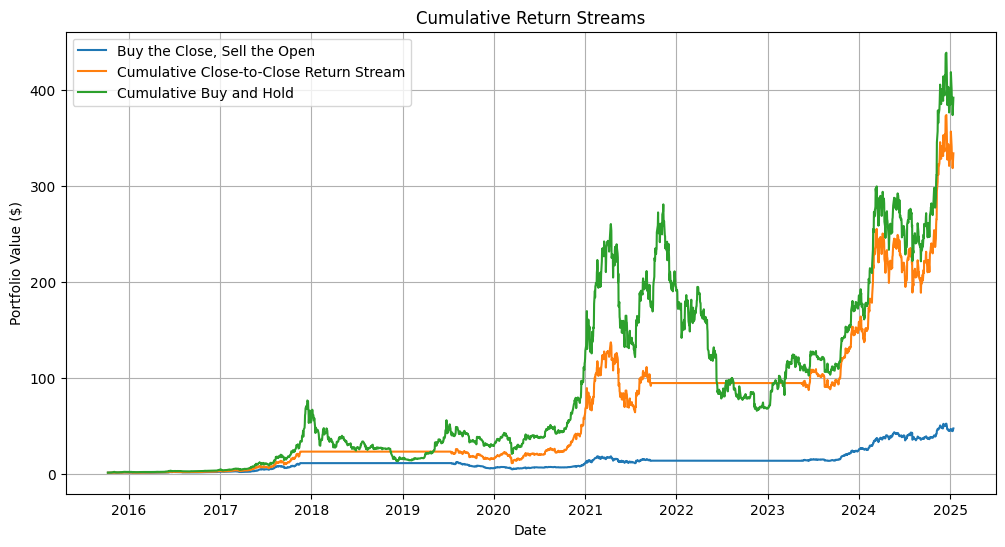

In [326]:
# Plot the cumulative return streams
plt.figure(figsize=(12, 6))
plt.plot(btc_data_plot.index, btc_data_plot['cumulative_return_stream'], label="Buy the Close, Sell the Open")
plt.plot(btc_data_plot.index, btc_data_plot['cumulative_close_to_close_stream'], label="Cumulative Close-to-Close Return Stream")
plt.plot(btc_data_plot.index, btc_data_plot['buyANDhold'], label="Cumulative Buy and Hold")
plt.title("Cumulative Return Streams")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

In [320]:
# Calculate Sharpe ratios for the cumulative return streams
risk_free_rate = 0.02 / 252  # Assuming 2% annual risk-free rate
sharpe_return_stream = (
    (btc_data_plot['cumulative_return_stream'].pct_change().mean() - risk_free_rate) /
    btc_data_plot['cumulative_return_stream'].pct_change().std() * np.sqrt(252)
)
sharpe_close_to_close_stream = (
    (btc_data_plot['cumulative_close_to_close_stream'].pct_change().mean() - risk_free_rate) /
    btc_data_plot['cumulative_close_to_close_stream'].pct_change().std() * np.sqrt(252)
)
buyANDholdSharpe = (
    (btc_data_plot['buyANDhold'].pct_change().mean() - risk_free_rate) /
    btc_data_plot['buyANDhold'].pct_change().std() * np.sqrt(252)
)
print(f"Sharpe Ratio (buyAndHold): {buyANDholdSharpe:.2f}")
print(f"Sharpe Ratio (Cumulative Return Stream): {sharpe_return_stream:.2f}")
print(f"Sharpe Ratio (Cumulative Close-to-Close Stream): {sharpe_close_to_close_stream:.2f}")

Sharpe Ratio (buyAndHold): 1.23
Sharpe Ratio (Cumulative Return Stream): 1.18
Sharpe Ratio (Cumulative Close-to-Close Stream): 1.43


In [323]:
# Calculate rolling Sharpe ratios for the cumulative return streams
btc_data_plot['rolling_sharpe_return_stream'] = (
    btc_data_plot['cumulative_return_stream'].pct_change().rolling(window=250).mean() - risk_free_rate
) / btc_data_plot['cumulative_return_stream'].pct_change().rolling(window=250).std() * np.sqrt(252)

btc_data_plot['rolling_sharpe_close_to_close_stream'] = (
    btc_data_plot['cumulative_close_to_close_stream'].pct_change().rolling(window=250).mean() - risk_free_rate
) / btc_data_plot['cumulative_close_to_close_stream'].pct_change().rolling(window=250).std() * np.sqrt(252)

btc_data_plot['rolling_sharpe_buyANDhold'] = (
    btc_data_plot['buyANDhold'].pct_change().rolling(window=250).mean() - risk_free_rate
) / btc_data_plot['buyANDhold'].pct_change().rolling(window=250).std() * np.sqrt(252)


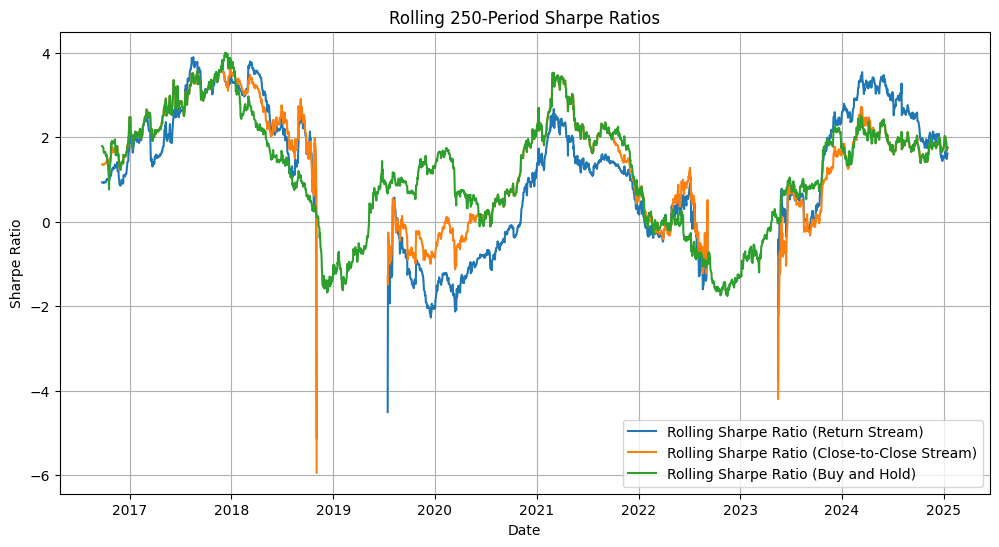

In [324]:
# Plot rolling Sharpe ratios
plt.figure(figsize=(12, 6))
plt.plot(btc_data_plot.index, btc_data_plot['rolling_sharpe_return_stream'], label="Rolling Sharpe Ratio (Return Stream)")
plt.plot(btc_data_plot.index, btc_data_plot['rolling_sharpe_close_to_close_stream'], label="Rolling Sharpe Ratio (Close-to-Close Stream)")
plt.plot(btc_data_plot.index, btc_data_plot['rolling_sharpe_buyANDhold'], label="Rolling Sharpe Ratio (Buy and Hold)")
plt.title("Rolling 250-Period Sharpe Ratios")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid()
plt.show()

In [293]:
btc_data_plot.to_csv("Sharpe_ratios_Buytheclose.csv")